In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data  = pd.read_csv('student_engagement_data_10000.csv')

In [45]:
print("<<<---Describe data with .info() method--->>>\n\n\n")
print(data.info(),'\n\n\n')

<<<---Describe data with .info() method--->>>



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
None 





In [46]:
print("<<<---Describe data with .describe() method--->>>\n\n\n")
data.describe()

<<<---Describe data with .describe() method--->>>





,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


In [47]:
print("<<<---Count nan Values in each coloumns--->>>\n\n\n")
data.isna().sum()

<<<---Count nan Values in each coloumns--->>>





Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

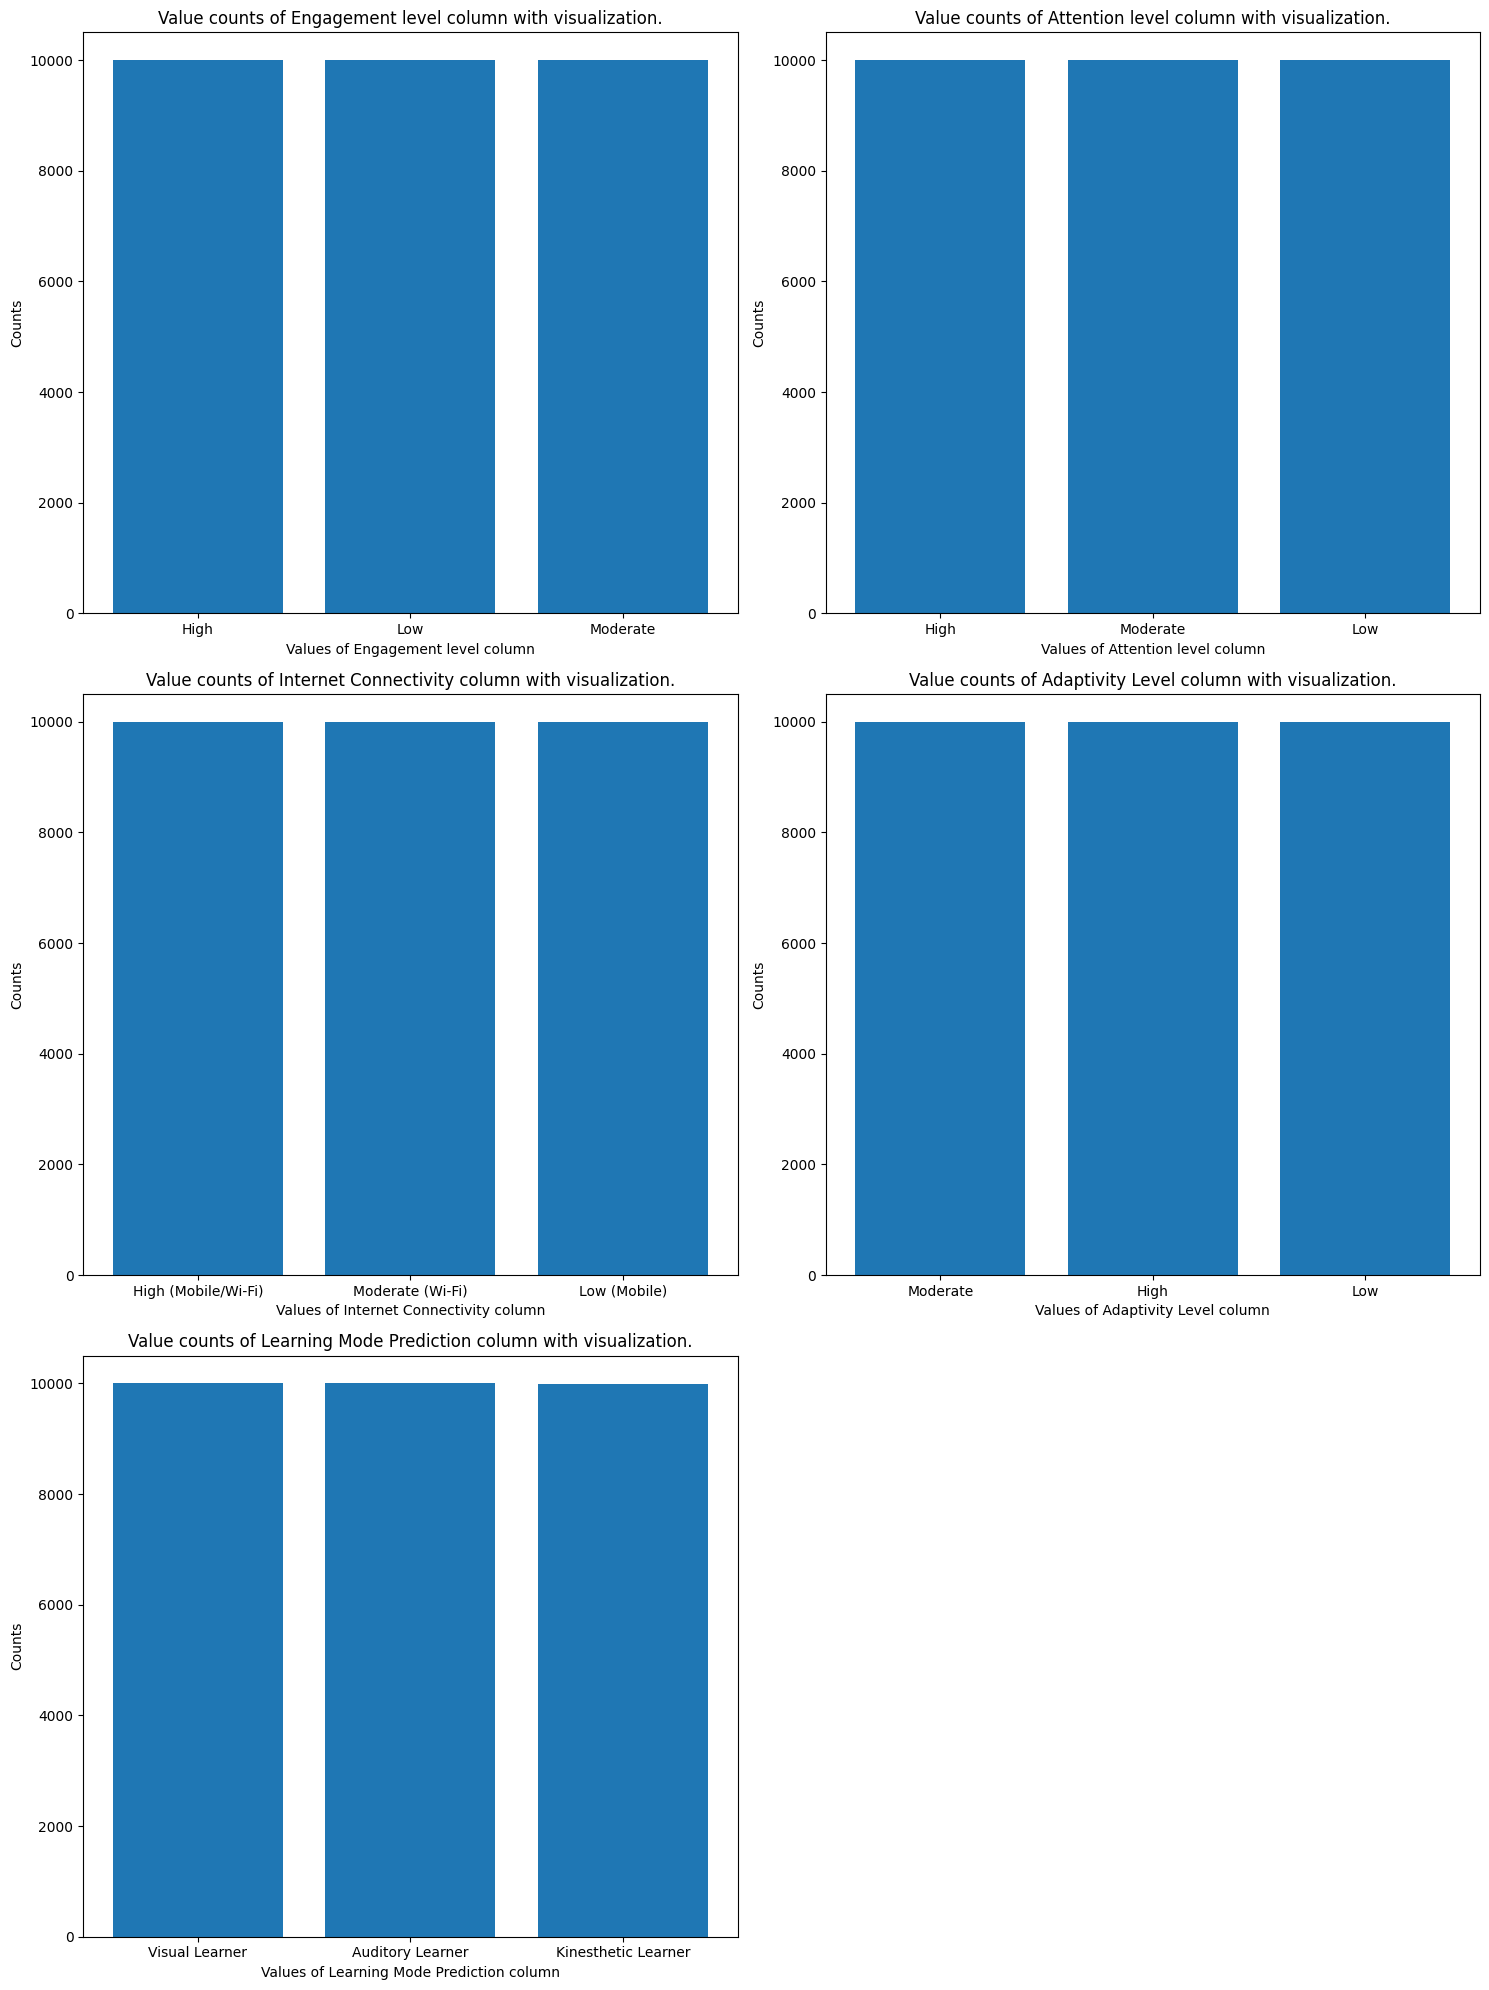

In [48]:
x = data['Engagement Level']
y = data['Student ID']


plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
plt.bar(x,y)
plt.title('Value counts of Engagement level column with visualization.')
plt.xlabel('Values of Engagement level column')
plt.ylabel('Counts')




x = data['Attention Level']
y = data['Student ID']

plt.subplot(3,2,2)
plt.bar(x,y)
plt.title('Value counts of Attention level column with visualization.')
plt.xlabel('Values of Attention level column')
plt.ylabel('Counts')



x = data['Internet Connectivity']
y = data['Student ID']

plt.subplot(3,2,3)
plt.bar(x,y)
plt.title('Value counts of Internet Connectivity column with visualization.')
plt.xlabel('Values of Internet Connectivity column')
plt.ylabel('Counts')



x = data['Adaptivity Level']
y = data['Student ID']

plt.subplot(3,2,4)
plt.bar(x,y)
plt.title('Value counts of Adaptivity Level column with visualization.')
plt.xlabel('Values of Adaptivity Level column')
plt.ylabel('Counts')



x = data['Learning Mode Prediction']
y = data['Student ID']

plt.subplot(3,2,5)
plt.bar(x,y)
plt.title('Value counts of Learning Mode Prediction column with visualization.')
plt.xlabel('Values of Learning Mode Prediction column')
plt.ylabel('Counts')



plt.tight_layout()
plt.show()

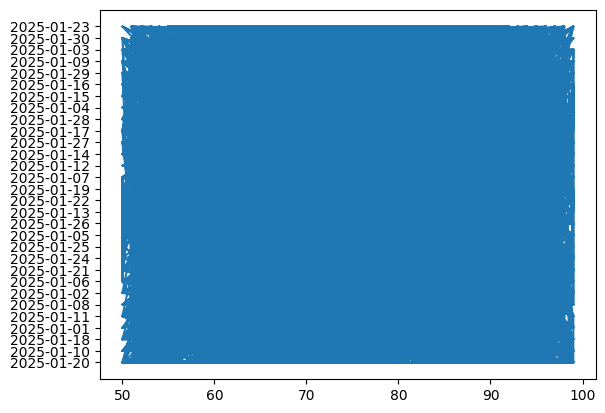

In [24]:
plt.close()

x = data['Performance Metrics']
y = data['Date']

plt.plot(x,y)
plt.show()

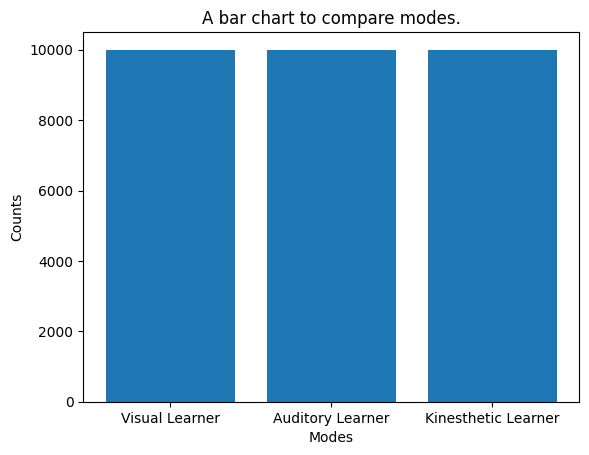

In [42]:
plt.close()

plt.bar(data['Learning Mode Prediction'] , data['Student ID'])
plt.title('A bar chart to compare modes.')
plt.xlabel('Modes')
plt.ylabel('Counts')
plt.show()